<a href="https://colab.research.google.com/github/rushika707/IIIT_HYD_Assignment/blob/main/Module_2_Lab_4_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)

---



This lab will be based upon t-SNE which is a dimensionality reduction algorithm used to visualize high dimensional datasets.

t-SNE stands for t-Distributed Stochastic Neighbor Embedding. It is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008 (Link to the paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

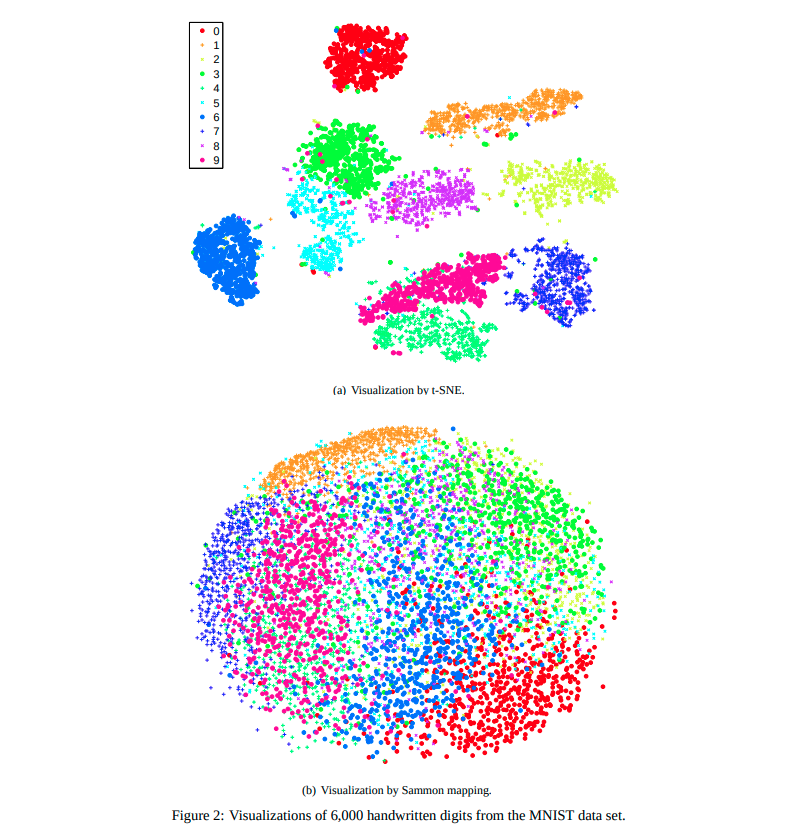

t-SNE has a tuneable parameter, **perplexity** which balances attention between the local and global aspects of your data. It is a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of t-SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

Also the t-SNE algorithm doesn’t always produce similar output on successive runs as there are additional hyperparameters related to the optimization process.

### HOW DOES T-SNE WORK??

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

1. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

2. This step is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (See fig below). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

3. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

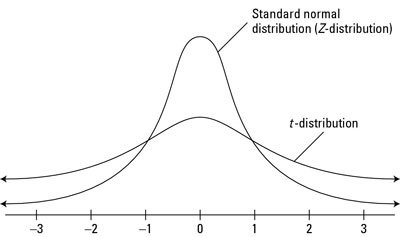

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

In [1]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

1797 images each of size 8 x 8 loaded using load_digits()

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

---



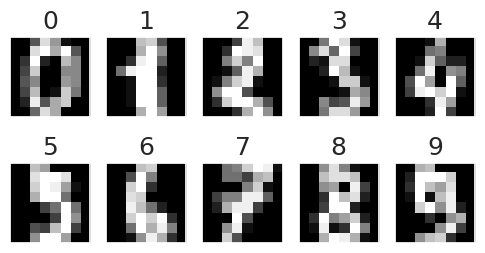

In [3]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [4]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [5]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

#### Visualizing the data in the projected space

---



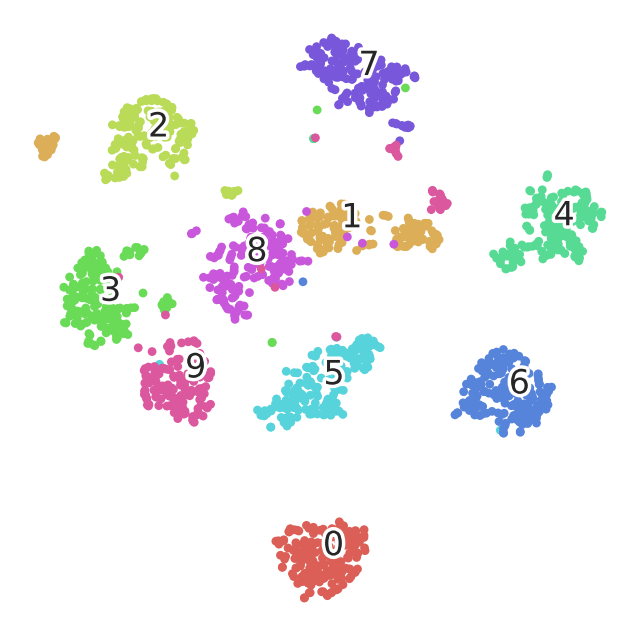

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78fec794ae60>)

In [6]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

# Tweaking some of the hyperparameters to better understand their role

---

### Changing the PERPLEXITY values


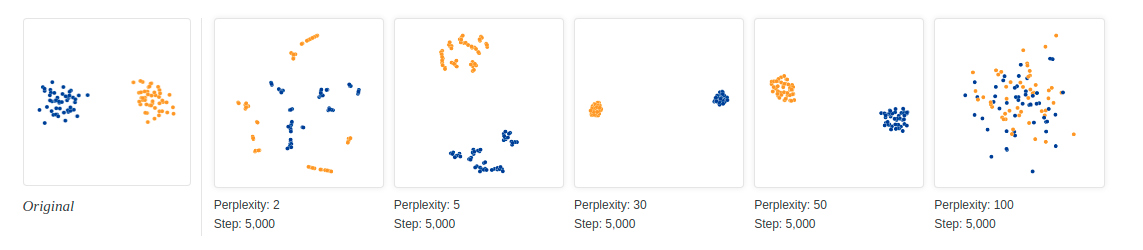

With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters, although with very different shapes. Outside that range, things get a little weird. With perplexity 2, local variations dominate. The image for perplexity 100, with merged clusters, illustrates a pitfall: for the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.



---


1. n_components : 2
2. perplexity : **5**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

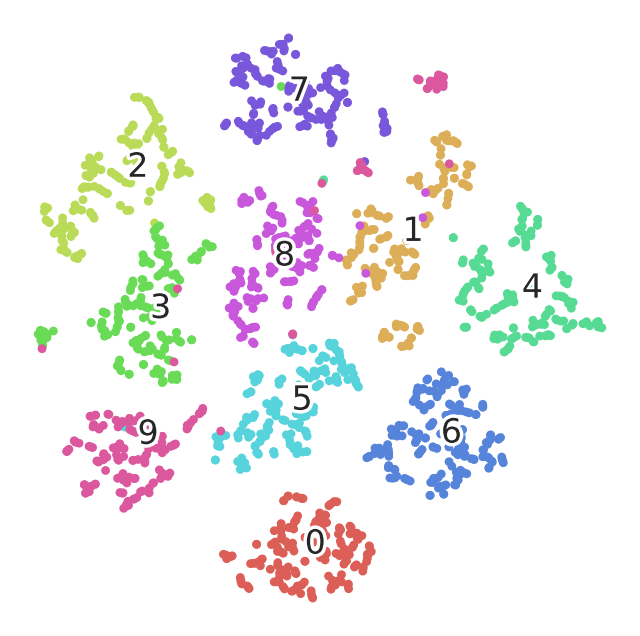

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78fec794a3e0>)

In [7]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.





---


1. n_components : 2
2. perplexity : **100**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

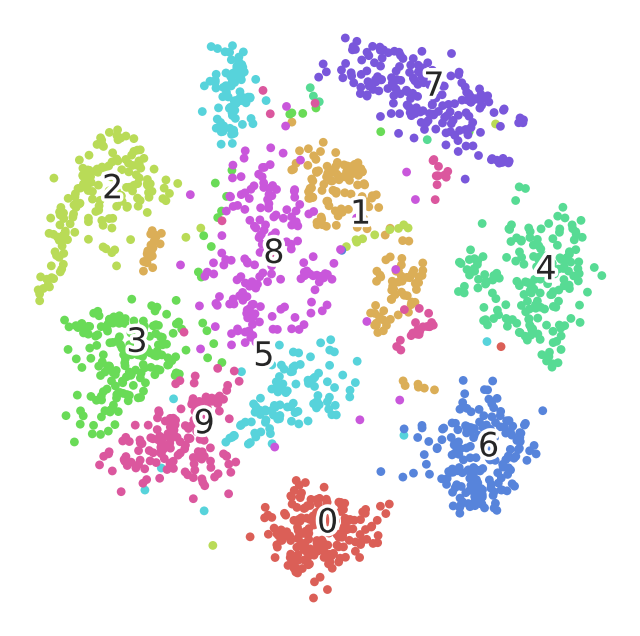

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78fec6050bb0>)

In [13]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=500).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---

### Changing the NUMBER OF ITERATIONS

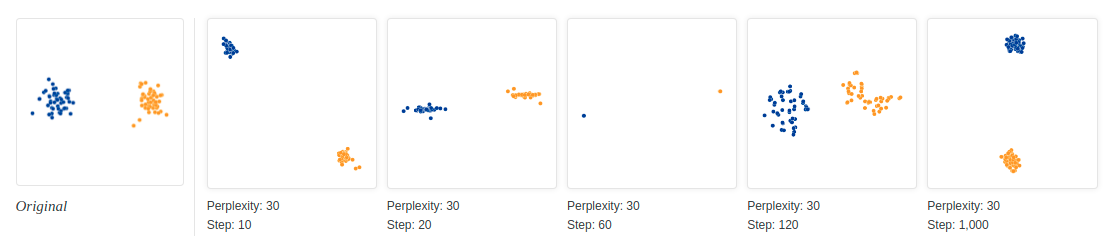

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30
3. n_iter : **250**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


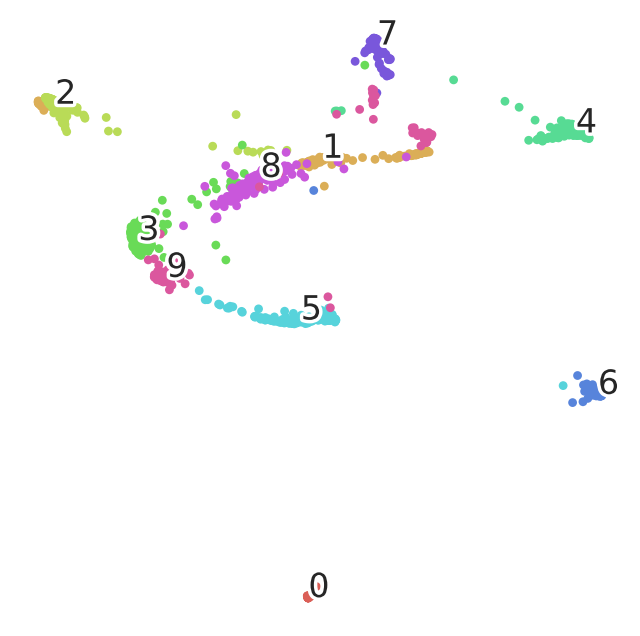

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78fec603f940>)

In [9]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups.

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


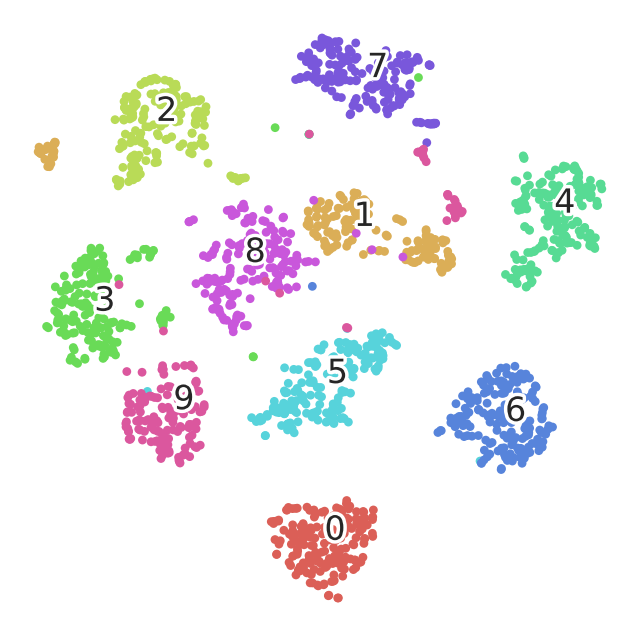

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78fec0430790>)

In [14]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=500).fit_transform(X)

scatter(digits_proj, y)

Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---

### Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.


---

1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : **‘exact’**


---

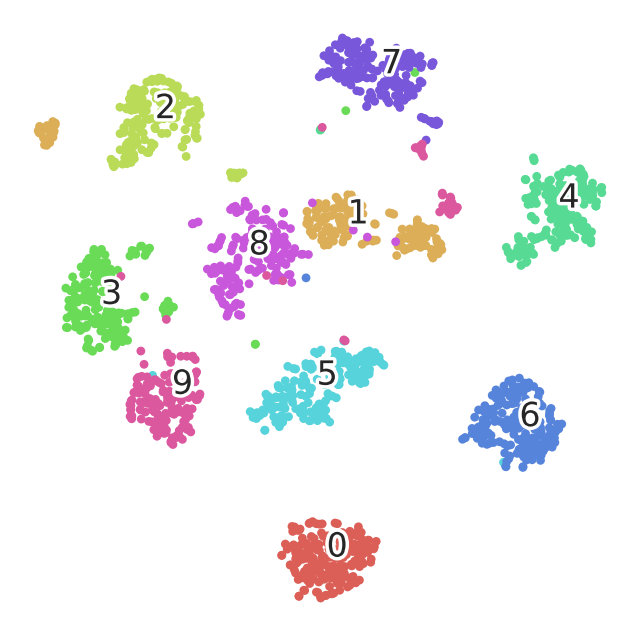

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78fec8468490>)

In [11]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

## EXERCISE

---



Try out different perplexity and iteration values to better appreciate the concepts taught.

You can modify the code in the cell below to check the resultant plots.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


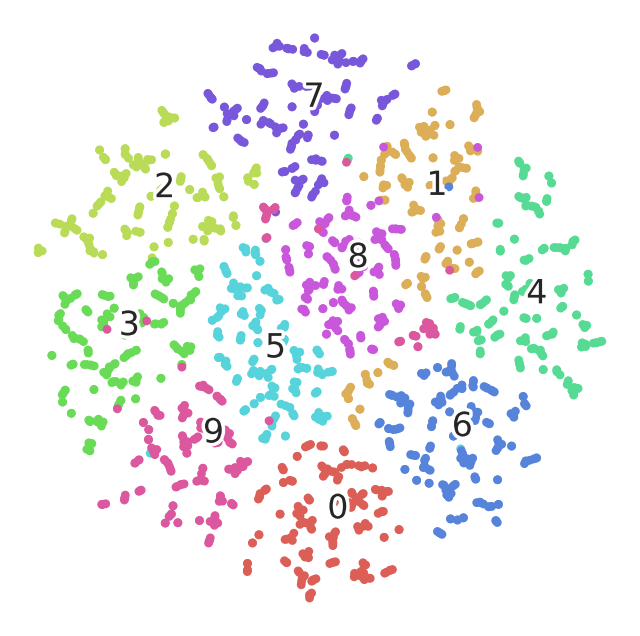

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a137138e500>)

In [ ]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 2
number_iterations = 1000
method = "barnes_hut"

###############################################################

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-15-113d69f7e429>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(digits_proj[:, 0], digits_proj[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 10), alpha=0.7)


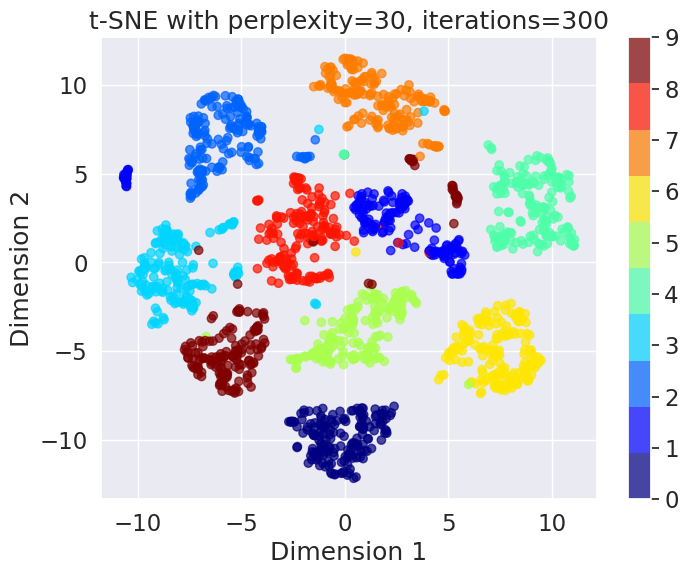

In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Example dataset
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

# Hyperparameters
perplexity_value = 30
number_iterations = 300
method = "barnes_hut"

# Apply t-SNE
digits_proj = TSNE(
    init="pca",
    random_state=42,
    n_iter=number_iterations,
    perplexity=perplexity_value,
    method=method
).fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(digits_proj[:, 0], digits_proj[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 10), alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title(f"t-SNE with perplexity={perplexity_value}, iterations={number_iterations}")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-16-15f14bb1a709>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(digits_proj[:, 0], digits_proj[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 10), alpha=0.7)


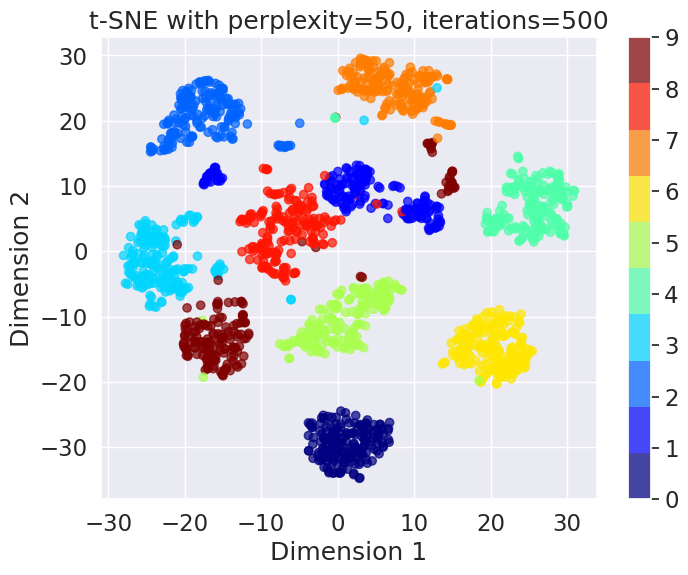

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Example dataset
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

# Hyperparameters
perplexity_value = 50
number_iterations = 500
method = "exact"

# Apply t-SNE
digits_proj = TSNE(
    init="pca",
    random_state=42,
    n_iter=number_iterations,
    perplexity=perplexity_value,
    method=method
).fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(digits_proj[:, 0], digits_proj[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 10), alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title(f"t-SNE with perplexity={perplexity_value}, iterations={number_iterations}")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()




---

## Exercise:

1. Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?


>##### Pointers:

> a. Which of the two algorithms is linear and which one is non-linear?    
b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?    
c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?    
d. Can you comment on which one of the two is computationally more expensive?

2. How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?

3. What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)


1)
### Differences Between PCA and t-SNE

1. **Linear vs. Non-Linear**  
   - **PCA (Principal Component Analysis)**: Linear. It projects data into a lower-dimensional space by maximizing variance along principal components. It is best suited for linearly separable data.  
   - **t-SNE (t-distributed Stochastic Neighbor Embedding)**: Non-linear. It models the probability distribution of data points and focuses on preserving local structures (e.g., clusters). It excels in capturing complex, non-linear patterns in high-dimensional data.  

2. **Non-linearity and its Role**  
   - t-SNE's non-linearity allows it to handle complex datasets where relationships between dimensions are not linear. For example, in datasets where points form curved manifolds (e.g., images or gene expression data), t-SNE can better reveal clusters or patterns.

3. **Local vs. Global Relationships**  
   - **PCA**: Preserves global structure, keeping points that are far apart in high-dimensional space far apart in the low-dimensional projection as well.  
   - **t-SNE**: Preserves local neighborhoods, emphasizing similarities among nearby points. This makes it excellent for visualizing clusters but can distort global distances.  

4. **Computational Complexity**  
   - **PCA**: Computationally efficient. It involves calculating the covariance matrix and its eigenvectors, making it relatively fast, especially for large datasets.  
   - **t-SNE**: Computationally expensive. It involves pairwise similarity calculations and optimization (via gradient descent), making it slower, particularly for large datasets. The "barnes_hut" approximation reduces this cost but is still more intensive than PCA.

---

### Advantages and Disadvantages

#### PCA:
- **Advantages**:
  - Simple, fast, and scalable for large datasets.
  - Retains global relationships in the data.
  - Useful for preprocessing before applying other algorithms.
- **Disadvantages**:
  - Assumes linear relationships.
  - May fail to reveal clusters or patterns in non-linear datasets.

#### t-SNE:
- **Advantages**:
  - Captures non-linear relationships and local structures effectively.
  - Great for visualizing clusters in high-dimensional data.
- **Disadvantages**:
  - Computationally expensive.
  - Sensitive to hyperparameters (e.g., perplexity and iterations).
  - Distorts global relationships, making it unsuitable for preserving overall data structure.

---

### Practical Choice:
- Use **PCA** when you need a fast, interpretable method for dimensionality reduction or as a preprocessing step for other algorithms.  
- Use **t-SNE** when visualizing complex, high-dimensional datasets to uncover patterns, clusters, or local structures.

2)
The computational complexity and runtime of **t-SNE** scale non-linearly with both dataset size and dimensionality, making it computationally expensive.
### 1. **Dependence on Dataset Size (`N`):**
t-SNE involves calculating pairwise similarities between all data points, leading to a quadratic scaling with the number of points:
- **Exact t-SNE**:  
  The complexity is **O(N²)**, where `N` is the number of data points. This is because pairwise Euclidean distances are calculated for all points to build a probability distribution.
- **Barnes-Hut Approximation**:  
  To reduce the quadratic complexity, the Barnes-Hut t-SNE uses a tree-based approximation for computing pairwise interactions, reducing the complexity to **O(N log N)**. However, the runtime still increases significantly with larger datasets.

---

### 2. **Dependence on Dimensionality (`D`):**
The runtime also depends on the number of dimensions `D`:
- High dimensionality increases the cost of pairwise distance computations and the gradient updates during optimization.
- The gradient descent step, which optimizes the embedding, operates on a transformed representation of the data and scales as **O(ND)** for each iteration.

---

### 3. **Number of Iterations (`T`):**
The number of iterations `T` also affects runtime, as the optimization procedure typically requires hundreds to thousands of iterations to converge.  
- Overall complexity per iteration: **O(N log N × D)** for Barnes-Hut t-SNE or **O(N² × D)** for exact t-SNE.

---

### 4. **Combined Complexity:**
For **Barnes-Hut t-SNE**, the overall complexity becomes:
- **O(N log N × D × T)**  
For **Exact t-SNE**, it is:
- **O(N² × D × T)**  

---

### Practical Implications:
1. **Large Datasets (`N` > 10,000):**
   - t-SNE becomes slow and memory-intensive.
   - Subsampling techniques or alternatives like UMAP are often used to handle very large datasets.

2. **High Dimensionality (`D` > 1000):**
   - Preprocessing with PCA (e.g., reducing to 50-100 dimensions) is recommended to mitigate the impact of high dimensionality on runtime.

3. **Number of Iterations (`T`):**
   - While increasing `T` can yield better embeddings, the runtime grows linearly with `T`. Balancing `T` for quality and speed is crucial.



3)
Here are **three key limitations or potential pitfalls** of using t-SNE:

---

### 1. **Sensitivity to Hyperparameters**  
   - t-SNE's results are highly sensitive to hyperparameters like **perplexity**, **learning rate**, and **number of iterations**.  
   - Choosing inappropriate values for these can distort the embedding, making the visualization unreliable. For example:
     - Too low or high **perplexity** can lead to poorly defined clusters.
     - Insufficient **iterations** may prevent convergence, while excessive iterations can overfit the embedding.
   - **Mitigation**: Experiment with multiple hyperparameter values and validate results against known structures in the data.

---

### 2. **Distortion of Global Structure**  
   - t-SNE prioritizes preserving **local neighborhoods**, often at the expense of **global relationships**.  
   - As a result, the distances between clusters in the 2D/3D visualization do not necessarily reflect actual distances in the high-dimensional space.  
   - **Example**: Two clusters that appear close in the t-SNE plot may be far apart in the original space.
   - **Mitigation**: Use t-SNE primarily for exploring local patterns or clusters, not for inferring global structures.

---

### 3. **Computational Inefficiency for Large Datasets**  
   - t-SNE is computationally expensive, scaling poorly with both dataset size (`N`) and dimensionality (`D`).  
   - Large datasets or high-dimensional data can result in excessive runtimes and memory usage, making t-SNE impractical without approximations like Barnes-Hut or preprocessing like PCA.  
   - **Mitigation**: Use techniques such as **PCA for dimensionality reduction** or alternatives like **UMAP** for faster and scalable embedding.

---

### Additional Pitfalls:
- **Stochastic Nature**: Different runs of t-SNE with the same parameters can produce slightly different embeddings because of the algorithm's stochastic initialization and optimization process.
  - **Solution**: Set a fixed random seed (`random_state`) for reproducibility.
  
- **Cluster Artifacts**: t-SNE can artificially create clusters even if no distinct groupings exist in the data, potentially misleading the analysis.
  - **Solution**: Combine t-SNE with domain knowledge or other cluster-validation methods.

- **Lack of Interpretability**: Unlike PCA, t-SNE embeddings are less interpretable because they do not provide clear insights into how the dimensions relate to original features.





---
 ## Some interesting references:

 1. https://blog.paperspace.com/dimension-reduction-with-t-sne/
 2. https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
 3. https://distill.pub/2016/misread-tsne/



---


